In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm as cmaps
from mpl_toolkits.axes_grid1 import make_axes_locatable

dimension = "2D3V"
R = [5,10,20]                   # Radius

model = "Full"         # Full - fully kinetic PIC; Hybrid - Hybrid PIC
#step = 49100*8
step = [49100*8,49100*8,49100*8]
species = "e"   # Full PIC usually have two species: p and e
components = ["x", "y"]
#model = "Hybrid"       # Full - fully kinetic PIC; Hybrid - Hybrid PIC
#step = 250*8
#gamma = 1           # For hybrid, an additional parameter is needed
#species = ["p"]

for i in range(len(R)):
    dat_dir = "../../Data/{model}/{dimension}/R{R:g}".format(model=model, dimension=dimension, R=R[i])
    dat_file = "{}/number_density_{}_step{s:g}.dat".format(dat_dir, species, s=step[i])  
    print("Loading data from [{}] ...".format(dat_file))
    locals()['n_{}'.format(R[i])] = np.genfromtxt(dat_file)

    dat_files = ["{dat_dir}/temperature_{spec}_{component}_step{step:g}.dat".format( \
    dat_dir=dat_dir, spec=species, component=component, step=step[i]) for component in components]
    print("Loading data from {} ...".format(dat_files))
    locals()['t_{}'.format(R[i])] = [np.genfromtxt(dat_file) for dat_file in dat_files]
print("Loading data completed!")

Loading data from [../../Data/Full/2D3V/R5/number_density_e_step392800.dat] ...
Loading data from ['../../Data/Full/2D3V/R5/temperature_e_x_step392800.dat', '../../Data/Full/2D3V/R5/temperature_e_y_step392800.dat'] ...
Loading data from [../../Data/Full/2D3V/R10/number_density_e_step392800.dat] ...
Loading data from ['../../Data/Full/2D3V/R10/temperature_e_x_step392800.dat', '../../Data/Full/2D3V/R10/temperature_e_y_step392800.dat'] ...
Loading data from [../../Data/Full/2D3V/R20/number_density_e_step392800.dat] ...
Loading data from ['../../Data/Full/2D3V/R20/temperature_e_x_step392800.dat', '../../Data/Full/2D3V/R20/temperature_e_y_step392800.dat'] ...
Loading data completed!


In [2]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,
}
colors1 = '#00CED1'
colors2 = '#DC143C'
colors3 = '#E9967A'

fontsize_label=18
fontsize_tick=16

In [3]:
iy = 0
n5 = n_5[iy,:]
t_x5 = t_5[0][iy,:]
t_y5 = t_5[1][iy,:]
vs5 = np.vstack((n5,t_x5,t_y5))

n10 = n_10[iy,:]
t_x10 = t_10[0][iy,:]
t_y10 = t_10[1][iy,:]
vs10 = np.vstack((n10,t_x10,t_y10))

n20 = n_20[iy,:]
t_x20 = t_20[0][iy,:]
t_y20 = t_20[1][iy,:]
vs20 = np.vstack((n20,t_x20,t_y20))


In [4]:
# np.a[line, 条件] 在此处意思为在第‘line’行中筛选满足‘idx’的元素构成的‘子数组’
# 其中 idx为第0行元素属于[0.1, 0.9]。
idx = np.logical_and(vs5[0] >= 0.1, vs5[0] <= 0.9)
x5 = np.log10(vs5[0, idx])
y15 = np.log10(vs5[1, idx])
y25 = np.log10(vs5[2, idx])

idx = np.logical_and(vs10[0] >= 0.1, vs10[0] <= 0.9)
x10 = np.log10(vs10[0, idx])
y110 = np.log10(vs10[1, idx])
y210 = np.log10(vs10[2, idx])

idx = np.logical_and(vs20[0] >= 0.1, vs20[0] <= 0.9)
x20 = np.log10(vs20[0, idx])
y120 = np.log10(vs20[1, idx])
y220 = np.log10(vs20[2, idx])

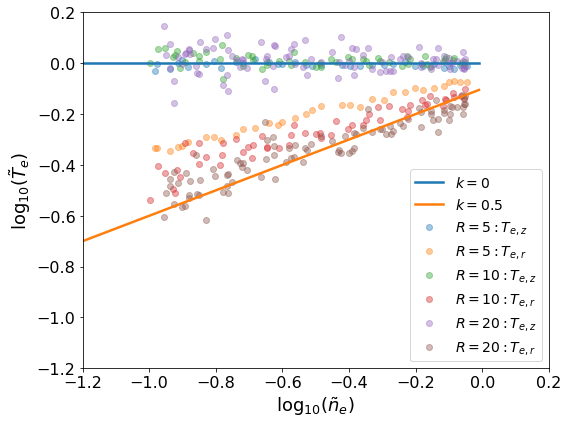

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
xbeg = -1.2
xend = 0.2
                                
a = np.arange(xbeg,0,0.01)
kb = 0
b = kb*a-0
if dimension == "2D3V":
    kc = 0.5
else: 
    kc = 1       
c = kc*a-0.1

ax.scatter(x5[::5], y15[::5], alpha=0.4, label="${R}=5:{T}_{e,z}$")
ax.scatter(x5[::5], y25[::5], alpha=0.4, label="${R}=5:{T}_{e,r}$")
ax.scatter(x10[::5], y110[::5], alpha=0.4, label="${R}=10:{T}_{e,z}$")
ax.scatter(x10[::5], y210[::5], alpha=0.4, label="${R}=10:{T}_{e,r}$")
ax.scatter(x20[::5], y120[::5], alpha=0.4, label="${R}=20:{T}_{e,z}$")
ax.scatter(x20[::5], y220[::5], alpha=0.4, label="${R}=20:{T}_{e,r}$")
ax.plot(a, b, "-", label="$k={}$".format(kb),linewidth=2.5)
ax.plot(a, c, "-", label="$k={}$".format(kc),linewidth=2.5)

# if dimension == "2D3V" :
#     t_z = fields_t[2][iy,:]
#     vs = np.vstack((vs,t_z))
#     y3 = np.log10(vs[3, idx])
#     ax.scatter(x[::5], y3[::5], alpha=0.4, c=colors3, label="${axi-sym}:{T}_z$")

ax.set_xlim([xbeg, xend])

ax.set_ylim([-1.2, 0.2])
ax.set_xticks(np.arange(xbeg, xend+0.01, 0.2))
ax.set_yticks(np.arange(-1.2, 0.20+0.01, 0.2))

ax.legend(loc = 'lower right', prop = font1)
ax.set_xlabel(r"log$_{10}(\tilde{n}_e)$", fontsize=fontsize_label)
ax.set_ylabel(r"log$_{10}(\tilde{T}_e)$", fontsize=fontsize_label)
ax.tick_params(labelsize=fontsize_tick)

img_name = "Fig/logTe-logne_{dimension}".format(R=R, dimension=dimension)
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
plt.savefig(img_name+".png", dpi=200)
plt.show()

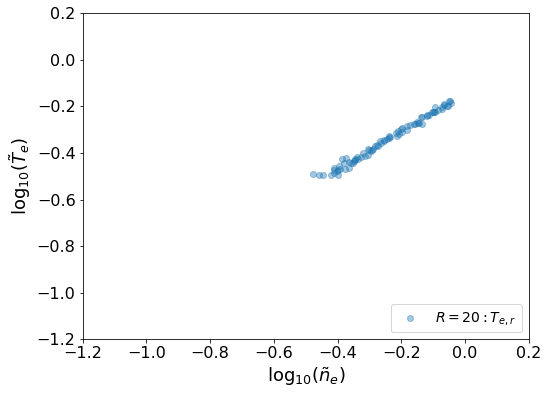

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
xbeg = -1.2
xend = 0.2

ax.scatter(x20[::5], y220[::5], alpha=0.4, label="${R}=20:{T}_{e,r}$")

ax.set_xlim([xbeg, xend])

ax.set_ylim([-1.2, 0.2])
ax.set_xticks(np.arange(xbeg, xend+0.01, 0.2))
ax.set_yticks(np.arange(-1.2, 0.20+0.01, 0.2))

ax.legend(loc = 'lower right', prop = font1)
ax.set_xlabel(r"log$_{10}(\tilde{n}_e)$", fontsize=fontsize_label)
ax.set_ylabel(r"log$_{10}(\tilde{T}_e)$", fontsize=fontsize_label)
ax.tick_params(labelsize=fontsize_tick)

plt.show()